In [129]:
# Importing libraries
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Polygon, mapping

# TODO: Modularizing code
# Make all methods that edit the map be decorators that take in
# Some ax (and maybe color) and return it after they've added their one thing

In [130]:
# Data cleaning methods
# clean_points - input geodataframe, removes any null point geometries
# If not, the pointplot gets angry
def clean_points(gdf):
    gdf = gdf[gdf.geometry.type == 'Point']
    return gdf

# clean_lineString - input geodataframe, converts LineString geometry to polygon
# This is because polyplot does not work on LineStrings!
# Please note that this actually fucking sucks
def clean_lineString(gdf):
    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
    return gdf

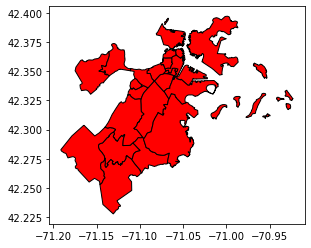

In [131]:
# Global Variables
boston = (-71.2, 42.2, -70.9, 42.4 ) # (minlon, minlat, maxlon, maxlat) of boston
boston_neighborhoods = gpd.read_file('datasets/Boston_Neighborhoods.geojson')
boston_neighborhoods.plot(color= 'red', edgecolor= 'black');
#ax = gplt.polyplot(boston_neighborhoods, extent = boston, edgecolor='white', facecolor='lightgray')

<AxesSubplot:>

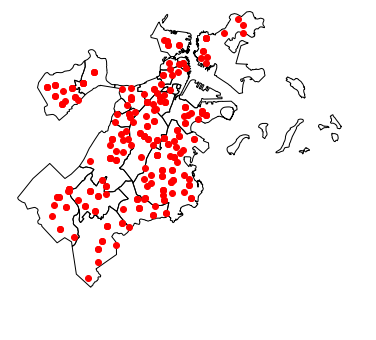

In [132]:
# Add polling locations [Point data type]
ax = gplt.polyplot(boston_neighborhoods, extent = boston)
polling_locations = clean_points(gpd.read_file('datasets/Polling_Locations.geojson'))
polling_locations.plot(ax = ax, color = 'red')

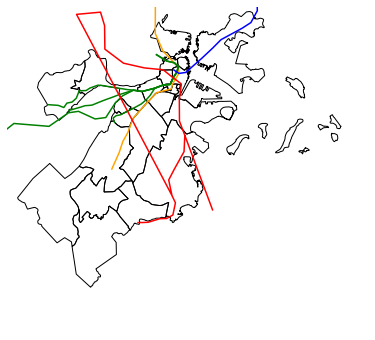

In [133]:
# Adding subway routes [LineString data type]
# Note that geoplot cannot plot linestrings!
# to plot a linestring, you must use the geopandas.plot method
ax = gplt.polyplot(boston_neighborhoods, extent = boston)
mbta_routes = gpd.read_file('datasets/routes.geojson')

# Plotting Orange Line
orange_line = mbta_routes.query("name=='Orange Line'")
ax = orange_line.plot(ax = ax, color= 'orange')

# Green Line
green_line = mbta_routes.query("name in ['Boston College (B)', 'Cleveland Circle (C)', 'Riverside (D)', 'Heath St. (E)']")
ax = green_line.plot(ax = ax, color = 'green')

# Red line
# Note - there's a problem here in the Braintree line.
# Fixing it requires... looking at the coordinates of
# each individual stop on the braintree line :/
red_line = mbta_routes.query("name in ['Braintree', 'Mattapan']")
ax = red_line.plot(ax = ax, color = 'red')

# Blue line
blue_line = mbta_routes.query("name == 'Blue Line'")
ax = blue_line.plot(ax = ax, color = 'blue')